<a href="https://colab.research.google.com/github/ari-econ/DATA101-Final-Project/blob/main/%5BDATA101%5D_Basic_Wages_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt #for visualization
from google.colab import drive #for google drive
import os #idk what this is lmao
import numpy as np
from scipy import stats
from tabulate import tabulate
import seaborn as sns
import geopandas as gpd #for map

In [2]:
drive.mount('/content/drive')
folder_path = "/content/drive/My Drive/[DATA101] Final Project/LFS 2023/"  #Folder path

Mounted at /content/drive


# **Loading the Dataset**

In [3]:
columns_to_keep = ["PUFREG", "PUFURB2015", "PUFC04_SEX", "PUFC05_AGE",
                   "PUFC06_MSTAT", "PUFC07_GRADE", "PUFC16_PKB", "PUFC25_PBASIC"]

Jan2023 = pd.read_csv("/content/drive/My Drive/[DATA101] Final Project/LFS 2023/LFS_January_2023.CSV", usecols=columns_to_keep)
Apr2023 = pd.read_csv("/content/drive/My Drive/[DATA101] Final Project/LFS 2023/LFS_April_2023.CSV", usecols=columns_to_keep)
Jul2023 = pd.read_csv("/content/drive/My Drive/[DATA101] Final Project/LFS 2023/LFS_July_2023.CSV", usecols=columns_to_keep)

LFS_merged = pd.concat([Jan2023, Apr2023, Jul2023], ignore_index=True)

#basic pay per day string to float
LFS_merged['PUFC25_PBASIC'] = pd.to_numeric(LFS_merged['PUFC25_PBASIC'], errors='coerce')


# **Wages by Urban/Rural and Region**
Includes difference between urban and rural average wages


Includes average wages across the regions

Average Basic Pay by Region:
    PUFREG  PUFC25_PBASIC
0       1     519.004485
1       2     535.535367
2       3     571.240887
3       4     619.671678
4       5     499.444540
5       6     519.100825
6       7     511.420280
7       8     513.591246
8       9     485.324645
9      10     484.670915
10     11     493.901592
11     12     457.537539
12     13     725.934949
13     14     598.407264
14     15     432.910767
15     16     497.568751
16     17     507.805717

Difference between Urban and Rural: 130.47553884180365


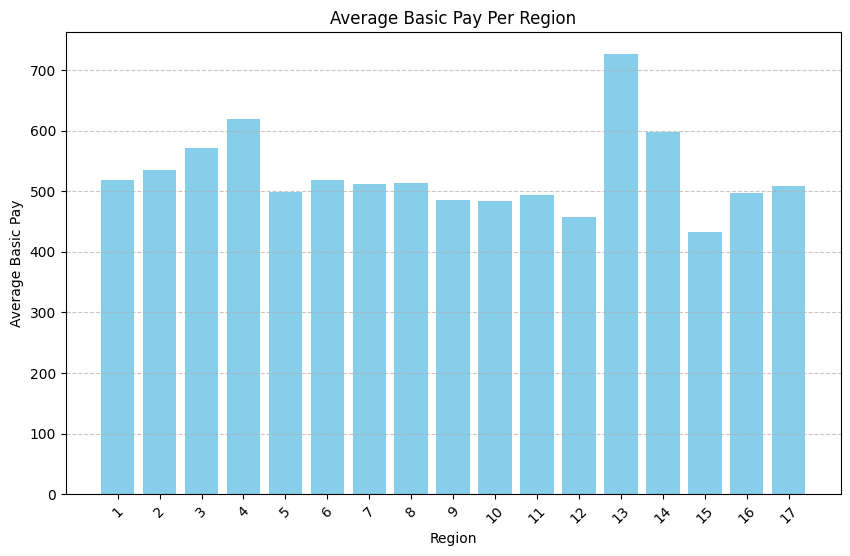

In [4]:
#assigning words to urban and rural
urban_rural = {1: 'Urban', 2: 'Rural'}
LFS_merged['PUFURB2015'] = LFS_merged['PUFURB2015'].map(urban_rural)


# Average basic pay per day across regions
region_avg = LFS_merged.groupby('PUFREG')['PUFC25_PBASIC'].mean().reset_index()

# Converting region to string
region_avg['PUFREG'] = region_avg['PUFREG'].astype(str)


# Difference between Urban and Rural basic pay (for curiosity)
urban_rural_avg = LFS_merged.groupby('PUFURB2015')['PUFC25_PBASIC'].mean()
urban_rural_diff = urban_rural_avg['Urban'] - urban_rural_avg['Rural']


print("Average Basic Pay by Region:\n", region_avg)
print("\nDifference between Urban and Rural:", urban_rural_diff)


plt.figure(figsize=(10, 6))

# Plotting everything
plt.bar(region_avg['PUFREG'], region_avg['PUFC25_PBASIC'], color='skyblue')

plt.title("Average Basic Pay Per Region")
plt.xlabel("Region")
plt.ylabel("Average Basic Pay")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

PUFURB2015       Rural       Urban  Pay_Difference
PUFREG                                            
1           503.870454  577.864583       73.994129
2           518.691287  602.196817       83.505530
3           531.984596  592.501103       60.516507
4           567.577422  641.361005       73.783583
5           477.709138  560.179283       82.470145
6           472.143613  563.868742       91.725129
7           455.877901  535.536038       79.658138
8           480.125786  600.745690      120.619903
9           449.251558  516.642400       67.390842
10          429.775448  524.990313       95.214865
11          417.199408  544.703361      127.503953
12          401.354839  499.138900       97.784061
13                 NaN  725.934949             NaN
14          565.280990  670.065535      104.784546
15          417.637465  452.860697       35.223231
16          467.733448  532.330655       64.597207
17          494.321216  527.245087       32.923871


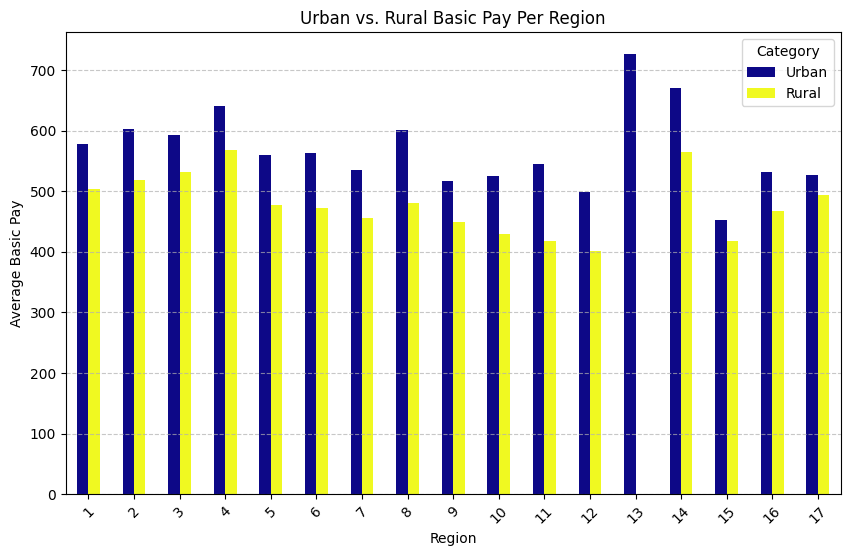

In [5]:
# Region with Urban Rural
urban_rural_region_avg = LFS_merged.groupby(['PUFREG', 'PUFURB2015'])['PUFC25_PBASIC'].mean().unstack()

# Calculate the difference between Urban and Rural per region (for curiorisity)
urban_rural_region_avg['Pay_Difference'] = urban_rural_region_avg['Urban'] - urban_rural_region_avg['Rural']

print(urban_rural_region_avg)

urban_rural_region_avg[['Urban', 'Rural']].plot(kind='bar', figsize=(10, 6), colormap='plasma')

#Plotting stuff
plt.title("Urban vs. Rural Basic Pay Per Region")
plt.xlabel("Region")
plt.ylabel("Average Basic Pay")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# **Wages by Sex and Region**

PUFC04_SEX      Female        Male  Pay_Difference
PUFREG                                            
1           544.520919  503.326937      -41.193982
2           542.552701  530.777339      -11.775362
3           568.340888  573.010081        4.669194
4           626.369119  615.168694      -11.200425
5           538.848493  476.876445      -61.972048
6           545.093183  500.818065      -44.275118
7           517.702508  506.843326      -10.859182
8           575.037310  476.214643      -98.822667
9           529.674269  459.344468      -70.329802
10          519.373725  464.708775      -54.664950
11          539.091409  470.895868      -68.195541
12          481.806287  442.332583      -39.473704
13          726.209373  725.741486       -0.467887
14          616.089693  586.558037      -29.531657
15          467.887529  415.169081      -52.718448
16          538.849129  474.124091      -64.725038
17          537.993205  488.108393      -49.884812


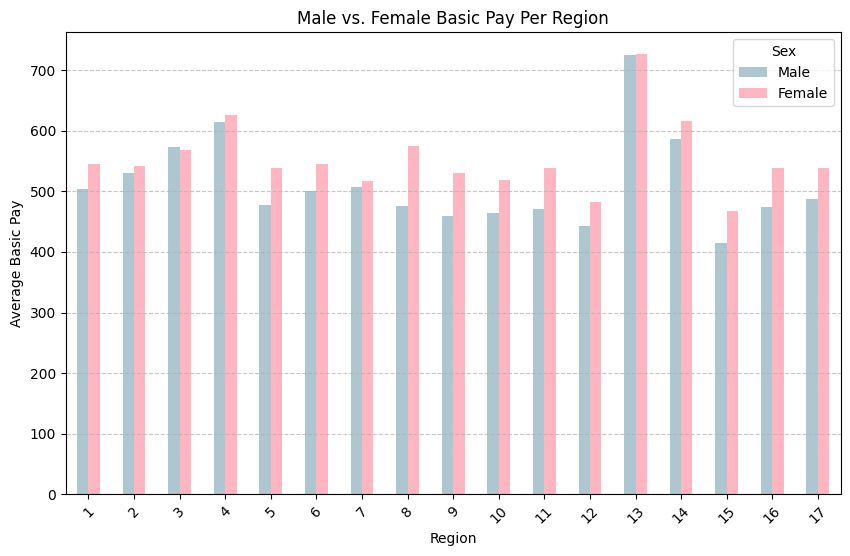

In [6]:
# Assigning categories for the gender variable
sex_mapping = {1: 'Male', 2: 'Female'}
LFS_merged['PUFC04_SEX'] = LFS_merged['PUFC04_SEX'].map(sex_mapping)

# Group by both Region and Sex, then calculate the mean basic pay
sex_region_avg = LFS_merged.groupby(['PUFREG', 'PUFC04_SEX'])['PUFC25_PBASIC'].mean().unstack()

# Calculate the difference between Male and Female per region
sex_region_avg['Pay_Difference'] = sex_region_avg['Male'] - sex_region_avg['Female']

# Display result
print(sex_region_avg)

# Bar graph comparing Male vs. Female pay per region
colors = ['#AEC6CF', '#FFB6C1']  # Pastel blue for Male, Pastel pink for Female

# Bar graph comparing Male vs. Female pay per region
sex_region_avg[['Male', 'Female']].plot(kind='bar', figsize=(10, 6), color=colors)

plt.title("Male vs. Female Basic Pay Per Region")
plt.xlabel("Region")
plt.ylabel("Average Basic Pay")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# **Wages by Across Sectors**

In [7]:
#loading the datasets again cause we're dropping some rows
columns_to_keep = ["PUFREG", "PUFURB2015", "PUFC04_SEX", "PUFC05_AGE",
                   "PUFC06_MSTAT", "PUFC07_GRADE", "PUFC16_PKB", "PUFC25_PBASIC"]

Jan2023 = pd.read_csv("/content/drive/My Drive/[DATA101] Final Project/LFS 2023/LFS_January_2023.CSV", usecols=columns_to_keep)
Apr2023 = pd.read_csv("/content/drive/My Drive/[DATA101] Final Project/LFS 2023/LFS_April_2023.CSV", usecols=columns_to_keep)
Jul2023 = pd.read_csv("/content/drive/My Drive/[DATA101] Final Project/LFS 2023/LFS_July_2023.CSV", usecols=columns_to_keep)

LFS_merged = pd.concat([Jan2023, Apr2023, Jul2023], ignore_index=True)

In [8]:
#primary occupation range string to float
LFS_merged['PUFC16_PKB'] = pd.to_numeric(LFS_merged['PUFC16_PKB'], errors='coerce')

# PUFC25_PBASIC to integer
LFS_merged['PUFC25_PBASIC'] = pd.to_numeric(LFS_merged['PUFC25_PBASIC'], errors='coerce')

#dropping NAs
LFS_merged = LFS_merged.dropna(subset=['PUFC16_PKB'])

# Define categorization function
def categorize(PUFC16_PKB):
    if PUFC16_PKB <= 3:
        return 'Agriculture'
    elif 4 <= PUFC16_PKB <= 43:
        return 'Industry'
    else:
        return 'Services'

LFS_merged['Occupation'] = LFS_merged['PUFC16_PKB'].apply(categorize)


<ipython-input-8-0f1ee577b3f6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LFS_merged['Occupation'] = LFS_merged['PUFC16_PKB'].apply(categorize)


Occupation  Agriculture    Industry    Services  Pay_Difference
PUFREG                                                         
1            345.534099  472.426706  587.383421      241.849322
2            335.352008  502.055912  621.249478      285.897470
3            391.391817  543.151324  603.306734      211.914917
4            395.716190  566.477807  662.496865      266.780674
5            349.593973  441.631027  558.678235      209.084262
6            295.725501  469.345125  571.910294      276.184792
7            292.751055  469.402110  545.691631      252.940576
8            309.016881  412.935533  586.346873      277.329992
9            277.597254  388.235984  563.484664      285.887410
10           311.853085  449.128146  547.177437      235.324352
11           338.189632  466.637938  577.114863      238.925231
12           297.273566  422.886861  536.540929      239.267363
13           495.294479  653.932662  747.452552      252.158074
14           334.929329  521.315358  715

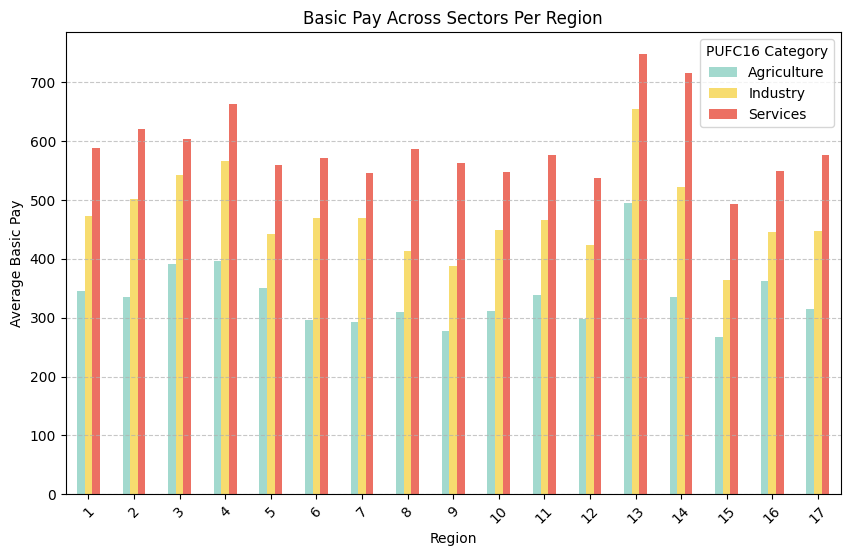

In [9]:
# Group by both Region and PUFC16_Category, then calculate the mean basic pay
category_region_avg = LFS_merged.groupby(['PUFREG', 'Occupation'])['PUFC25_PBASIC'].mean().unstack()

# difference between Agriculture and Services per region
category_region_avg['Pay_Difference'] = category_region_avg['Services'] - category_region_avg['Agriculture'] #add more if you are curious

# Display result
print(category_region_avg)

# Bar graph comparing PUFC16_Category pay per region
colors = ['#A2D9CE', '#F7DC6F', '#EC7063']  # Teal for Agriculture, Yellow for Industry, Red for Services

category_region_avg[['Agriculture', 'Industry', 'Services']].plot(kind='bar', figsize=(10, 6), color=colors)

plt.title("Basic Pay Across Sectors Per Region")
plt.xlabel("Region")
plt.ylabel("Average Basic Pay")
plt.xticks(rotation=45)
plt.legend(title="PUFC16 Category")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()